<a href="https://colab.research.google.com/github/Romal27/DSGP-24-Retina94/blob/component-1/SVMClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Accuracy:  0.992
Prediction is: NF


<function matplotlib.pyplot.show(close=None, block=None)>

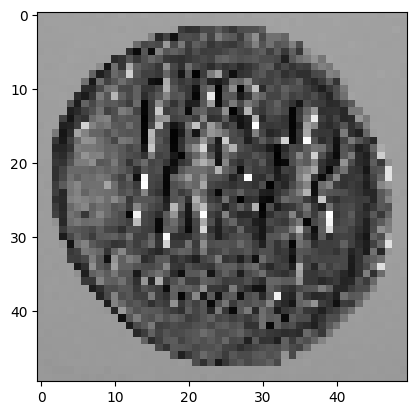

In [ ]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pickle
import random
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# # Specify the directory containing the subdirectories with images
# dir = '/content/drive/My Drive/DSGP/Data'  # Adjust this path to your folder

# # Define the categories (subfolders)
# categories = ['F', 'NF']  # Ensure these match the actual folder names in your Google Drive

# data = []

# # List of acceptable image extensions
# valid_extensions = ['.jpg', '.jpeg', '.png', '.bmp', '.tiff']

# # Loop through each category folder
# for category in categories:
#     path = os.path.join(dir, category)
#     label = categories.index(category)

#     if not os.path.exists(path):  # Check if the path exists
#         print(f"Path does not exist: {path}")
#         continue  # Skip to the next category if the path doesn't exist

#     # Loop through all the files in the category folder
#     for img in os.listdir(path):
#         imgpath = os.path.join(path, img)  # Get the full path to the image

#         # Skip non-image files based on extension
#         if not any(img.lower().endswith(ext) for ext in valid_extensions):
#             continue

#         data_img = cv2.imread(imgpath, 0)  # Read the image as grayscale

#         if data_img is None:
#             print(f"Failed to load image: {imgpath}")  # Add a message if the image couldn't be loaded
#             continue  # Skip to the next image if the current one can't be loaded

#         try:
#             data_img = cv2.resize(data_img, (50, 50))  # Resize the image to 50x50
#             image = np.array(data_img).flatten()  # Flatten the image

#             data.append([image, label])
#         except Exception as e:
#             print(f"Error processing image {imgpath}: {e}")  # Print out any resizing errors
#             pass

# print(f"Total images processed: {len(data)}")
# pick_in = open('/content/drive/My Drive/data1.pickle', 'wb')  # Save directly to Google Drive
# pickle.dump(data, pick_in)
# pick_in.close()


pick_in = open('/content/drive/My Drive/data1.pickle','rb')
data = pickle.load(pick_in)
pick_in.close

random.shuffle(data)
features = []
labels = []

for feature,label in data:
  features.append(feature)
  labels.append(label)

xtrain,xtest,ytrain,ytest = train_test_split(features,labels,test_size=0.5) # For lesser computational time


# model = SVC(C =1,kernel ='poly',gamma = 'auto')
# model.fit(xtrain,ytrain)

# pick = open('/content/drive/My Drive/model.sav', 'wb')
# pickle.dump(model,pick)
pick = open('/content/drive/My Drive/model.sav','rb') # for demostration
model = pickle.load(pick)
pick.close()

prediction = model.predict(xtest)

accuracy = model.score(xtest,ytest)
categories = ['F', 'NF']
print('Accuracy: ', accuracy)
print('Prediction is:',categories[prediction[0]])

mydata = xtest[0].reshape(50,50)
plt.imshow(mydata,cmap='gray')
plt.show

